In [65]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [66]:
#An example of using the Euclidean distance
a = (1, 2, 3)
b = (4, 5, 6)
dst = distance.euclidean(a, b)
dst

5.196152422706632

In [67]:
iris = load_iris()
X = iris.data
y = iris.target

#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define the kNN function
def knn(X_train, y_train, X_test, k):
    y_pred = []
    for test_x in X_test:
        distances = []
        for train_x in X_train:
            dist = distance.euclidean(test_x, train_x)
            distances.append(dist)
        nearest = np.argsort(distances)[:k]
        neighbors = y_train[nearest]
        prediction = np.bincount(neighbors).argmax()
        y_pred.append(prediction)
    return y_pred

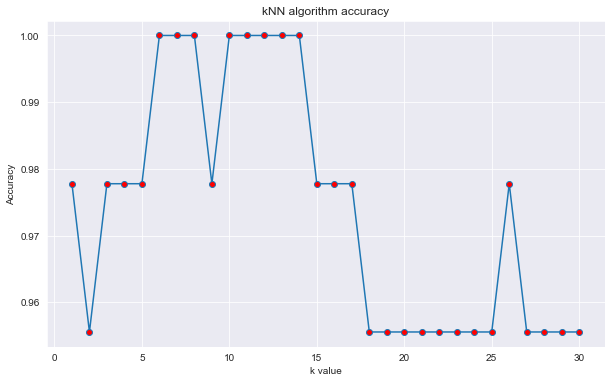

In [68]:
n = 30
y_preds = []
acc = []
for k in range(1, n+1):
    y_pred = knn(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    y_preds.append(y_pred)
    acc.append(accuracy)
x_vec = np.arange(1,n+1, 1)
plt.figure(figsize=(10,6))
plt.plot(x_vec, acc, marker='o', markerfacecolor='r')
plt.title("kNN algorithm accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()

Best k for this dataset is 6

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

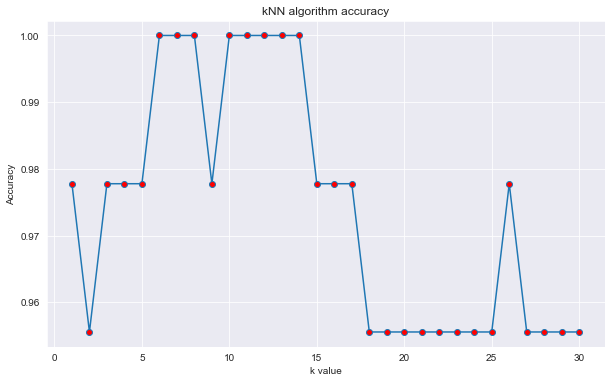

In [70]:
n = 30
y_preds2 = []
acc2 = []
for k in range(1, n+1):
    kNN = KNeighborsClassifier(k)
    kNN.fit(X_train, y_train)
    y_pred = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_preds2.append(y_pred)
    acc2.append(accuracy)
x_vec = np.arange(1,n+1, 1)
plt.figure(figsize=(10,6))
plt.plot(x_vec, acc2, marker='o', markerfacecolor='r')
plt.title("kNN algorithm accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()

In [71]:
print(f"Own kNN implementation best k value = {acc.index(max(acc)) + 1}")
print(f"sklearn library kNN best k value = {acc2.index(max(acc2)) + 1}")

Own kNN implementation best k value = 6
sklearn library kNN best k value = 6


In [72]:
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)
clf.predict(iris.data[:1, :])
clf.predict_proba(iris.data[:1, :])

from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write("iris.pdf")


True

In [73]:
# -*- coding: utf-8 -*-
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn import tree
from scipy.io import loadmat
from tensorflow import keras
from keras.datasets import mnist

# wczytywanie danych (np. z biblioteki keras)
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
#Ex.1.Divide the data into parameters X and answer y:
X = np.concatenate((train_X, test_X), axis=0)
y = np.concatenate((train_y, test_y), axis=0)
# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])

# Convert digit 10 -> 0 (error in the dataset)
y[np.where(y==10)]=0

# the height and width of the picture with the number
h = 28
w = 28
print(f"Number of digits: {X.shape[0]}")
print(f"Number of pixels per image {X.shape[1]*X.shape[2]}")

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
Number of digits: 70000
Number of pixels per image 784


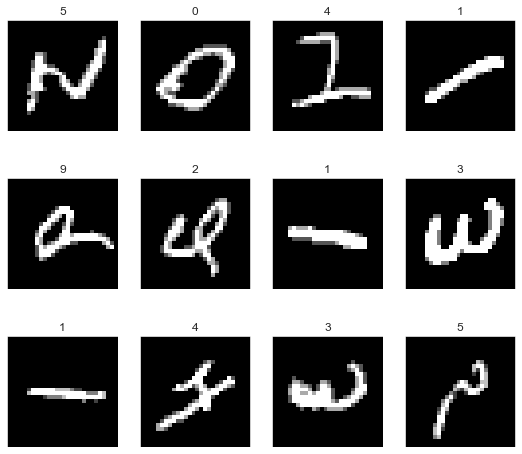

In [74]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_mnist(X,y, h, w)
plt.show()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
y_train = y_train.reshape((-1,1))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(49000, 28, 28)
(21000, 28, 28)
(49000,)
(21000,)
(49000, 784)
(21000, 784)
(49000, 1)


In [76]:
DEPTH = 10
clf = tree.DecisionTreeClassifier(max_depth=DEPTH)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [77]:
f1_score = f1_score(y_test, y_pred, average='macro')
print(f"F1 = {f1_score}")

F1 = 0.8212994775103513


In [78]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[1859    0   43   17   10   45   71   17   19    4]
 [   0 2217   36   28   10    7   19   14   10    7]
 [  37   33 1746   43   37   32   59   53   51   11]
 [  16   12   94 1633   11  202   21   33   49   70]
 [  11   16   92   22 1686   34   55   16   19  162]
 [  29    9   48  154   37 1428   72   29   44   33]
 [  42   11   78   19   51   33 1730    9   42    4]
 [   6   21   70   42   32   21    4 1920   20   81]
 [  36   55  107   59   24   96   59   19 1473   61]
 [  21   33   88   72   87   69   18   77   34 1604]]


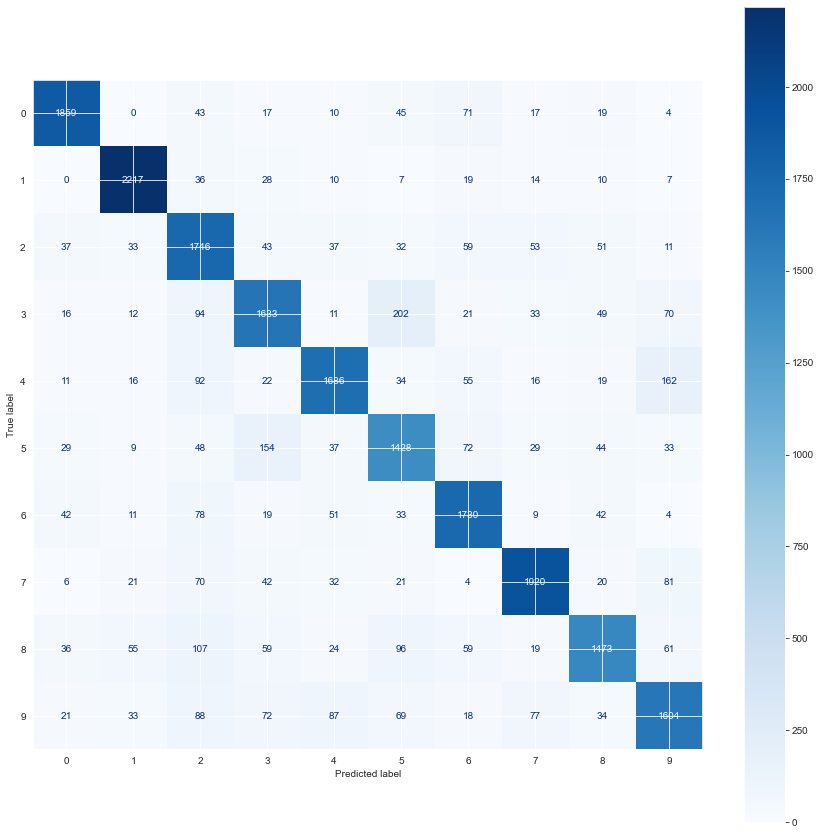

In [79]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
fig = disp.figure_
fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()

In [80]:
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      2085
           1       0.92      0.94      0.93      2348
           2       0.73      0.83      0.78      2102
           3       0.78      0.76      0.77      2141
           4       0.85      0.80      0.82      2113
           5       0.73      0.76      0.74      1883
           6       0.82      0.86      0.84      2019
           7       0.88      0.87      0.87      2217
           8       0.84      0.74      0.79      1989
           9       0.79      0.76      0.77      2103

    accuracy                           0.82     21000
   macro avg       0.82      0.82      0.82     21000
weighted avg       0.83      0.82      0.82     21000

